### Section 3: Test Sub Sample Differences
Develop two questions that require you to apply a two-sample test for each question and 
run these tests and derive insights from the data.

In [80]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [82]:
sample_test = pd.read_csv("../data/proceed/Clean_data.csv")

/var/folders/fb/070x0zqn3z353_kj3gkd5ych0000gn/T/ipykernel_9559/4114600162.py:1: DtypeWarning: Columns (2,4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_test = pd.read_csv("../data/proceed/Clean_data.csv")


In [84]:
sample_test.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_chain_l1_name,salesperson_code,market_segment,value_sales,value_cost,...,contact_method_code_NA,contact_method_code_Other,order_type_code_EDI,order_type_code_NOR,order_type_code_Other,Profit,Unit_Price,Profit_Margin,Transformed_Profit,Transformed_Unit_Price
0,2012-05-09,101,411800601,410,GENIE8WWWBC,ElectraCorp Ltd,T612,Commercial & Industrial,218.40,178.1976,...,True,False,False,True,False,40.2024,2.60,18.407692,6.340536,1.280934
1,2012-02-16,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,38.28,25.4568,...,True,False,False,True,False,12.8232,3.19,33.498433,3.580950,1.432701
2,2012-05-09,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,40.20,25.4568,...,True,False,False,True,False,14.7432,3.35,36.674627,3.839687,1.470176
3,2012-05-18,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,20.10,12.7284,...,True,False,True,False,False,7.3716,3.35,36.674627,2.715069,1.470176
4,2012-01-09,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,19.14,12.7284,...,True,False,True,False,False,6.4116,3.19,33.498433,2.532114,1.432701


In [115]:
for i in sample_test.columns:
    print(i)

accounting_date
company_code
customer_code
customer_district_code
item_code
business_chain_l1_name
salesperson_code
market_segment
value_sales
value_cost
value_quantity
value_price_adjustment
currency
invoice_number
line_number
invoice_date
customer_order_number
order_date
dss_update_time
day_gap
order_group
value_sales_log_plus1_transformed
value_cost_log_plus1_transformed
value_quantity_log_plus1_transformed
business_area_code_COM
business_area_code_DLT
business_area_code_LMP
business_area_code_OTH
business_area_code_Other
business_area_code_SUR
item_group_code_999
item_group_code_Other
item_class_code_14001
item_class_code_LMP01
item_class_code_LMP03
item_class_code_LMP04
item_class_code_LMP05
item_class_code_Other
item_type_1
item_type_5
item_type_6
item_type_7
item_type_Other
bonus_group_code_Professional
bonus_group_code_Trade
environment_group_code_C
environment_group_code_Other
environment_group_code_P
environment_group_code_R
environment_group_code_S
technology_group_code_219


#### Q1. Is there a significant difference in the log-transformed average value_sales between Top Sellers and Low Sellers categories?

To determine if there is a significant difference in the average log-transformed value_sales between Top Sellers and Low Sellers (classified by abc_class_code as 'A' for Top Sellers and 'C' for Low Sellers), we will perform a two-sample t-test to compare the means of these two independent groups.

**Formulate Hypotheses:**

Null Hypothesis (H₀) -  The mean of the log-transformed value_sales is the same for Top Sellers and Low Sellers. (H₀:μTopSellers =μLowSellers)

Alternative Hypothesis (H₁) - The mean of the log-transformed value_sales is different between Top Sellers and Low Sellers. (H₁:μTopSellers =/ μLowSellers)

​**Analysis Approach** If the p-value from the t-test is less than the chosen significance level (usually 0.05), we will reject the null hypothesis, suggesting a significant difference in the average log-transformed value_sales between Top Sellers and Low Sellers. If the p-value is greater than 0.05, we will fail to reject the null hypothesis, indicating no significant difference in the means of these two groups.

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Filtering data for top sellers (A) and low sellers (C)
abc_class = sample_test[(sample_test['abc_class_code_A'] == 1) | (sample_test['abc_class_code_C'] == 1)]

# Separating data into two groups for the t-test
top_sellers_sales = abc_class[abc_class['abc_class_code_A'] == 1]['value_sales_log_plus1_transformed']
low_sellers_sales = abc_class[abc_class['abc_class_code_C'] == 1]['value_sales_log_plus1_transformed']

# Performing the two-sample t-test
t_stat, p_value = stats.ttest_ind(top_sellers_sales, low_sellers_sales, equal_var=False)  # Using Welch's t-test for unequal variance

# Displaying the test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The mean log-transformed value_sales are significantly different between Top Sellers and Low Sellers.")
else:
    print("There is no significant difference in the log-transformed value_sales between Top Sellers and Low Sellers.")

T-statistic: -5.987554554500018
P-value: 2.131954785068421e-09
The mean log-transformed value_sales are significantly different between Top Sellers and Low Sellers.


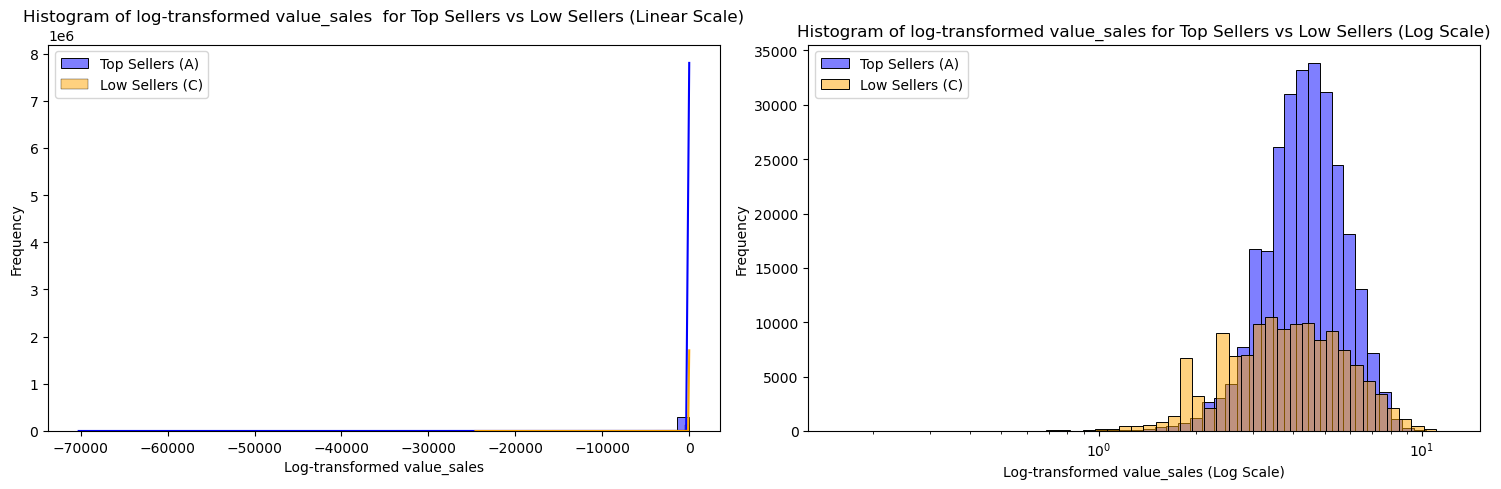

In [275]:
# Create 2 subplot layout
plt.figure(figsize=(15, 5))

# First histogram: Linear scale
plt.subplot(1, 2, 1)
sns.histplot(top_sellers_sales, bins=50, kde=True, color='blue', label='Top Sellers (A)', log_scale=False)
sns.histplot(low_sellers_sales, bins=50, kde=True, color='orange', label='Low Sellers (C)', log_scale=False)
plt.title("Histogram of log-transformed value_sales  for Top Sellers vs Low Sellers (Linear Scale)")
plt.xlabel("Log-transformed value_sales")
plt.ylabel("Frequency")
plt.legend()

# Second histogram: Log scale
plt.subplot(1, 2, 2)
sns.histplot(top_sellers_sales, bins=50, kde=True, color='blue', label='Top Sellers (A)', log_scale=True)
sns.histplot(low_sellers_sales, bins=50, kde=True, color='orange', label='Low Sellers (C)', log_scale=True)
plt.title("Histogram of log-transformed value_sales for Top Sellers vs Low Sellers (Log Scale)")
plt.xlabel("Log-transformed value_sales (Log Scale)")
plt.ylabel("Frequency")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

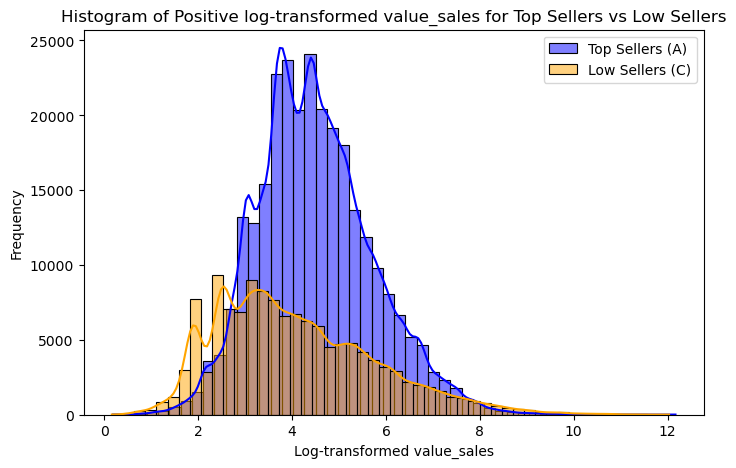

In [263]:
# Filter out negative values in value_sales for both top sellers and low sellers
top_sellers_sales_positive = top_sellers_sales[top_sellers_sales > 0]
low_sellers_sales_positive = low_sellers_sales[low_sellers_sales > 0]

# Plotting histogram with only positive values
plt.figure(figsize=(8, 5))
sns.histplot(top_sellers_sales_positive, bins=50, kde=True, color='blue', label='Top Sellers (A)', log_scale=False, alpha=0.5)
sns.histplot(low_sellers_sales_positive, bins=50, kde=True, color='orange', label='Low Sellers (C)', log_scale=False, alpha=0.5)
plt.title("Histogram of Positive log-transformed value_sales for Top Sellers vs Low Sellers")
plt.xlabel("Log-transformed value_sales")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**In summary**

The result of the p-value shows that it is significantly less than the standard significance level of 0.05; hence, we **reject the null hypothesis**. This indicates that there is a statistically significant difference in the mean log-transformed value of sales between Top Sellers (A) and Low Sellers (C).

Referring to the histogram visualization above, we observe clear differences in the distributions between the two groups: Top Sellers have higher log-transformed sales values than Low Sellers. This aligns with the t-test results, which indicate a statistically significant difference, reinforcing that Top Sellers and Low Sellers perform differently in terms of sales. This information is valuable for management as it highlights the distinct performance characteristics of these categories, potentially informing decisions on inventory, pricing strategies, and marketing focus.

#### Q2. Is there a statistically significant difference in the average Transformed_Profit between products with LED lights and those with Traditional lights?

To determine if there is a significant difference in the average Transformed_Profit between LED and Traditional light sources, we will perform a two-sample t-test to compare the means of these two independent groups.

**Formulate Hypotheses:**

Null Hypothesis (H₀) -  The mean Transformed_Profit is the same for LED and Traditional light sources. (H₀:μLED =μTraditional)

Alternative Hypothesis (H₁) - The mean Transformed_Profit is different between LED and Traditional light sources. (H₁:μLED =/ μTraditional)

​**Analysis Approach** If the p-value from the t-test is less than the chosen significance level (usually 0.05), we will reject the null hypothesis, suggesting a significant difference in the average Transformed_Profit between LED and Traditional light sources. If the p-value is greater than 0.05, we will fail to reject the null hypothesis, indicating no significant difference in the means of these two groups.

In [243]:
# Filtering data for LED and Traditional light sources
light_source_data = sample_test[(sample_test['light_source_LED'] == 1) | (sample_test['light_source_Traditional'] == 1)]

# Separating data into two groups for the t-test
led_profit = light_source_data[light_source_data['light_source_LED'] == 1]['Transformed_Profit']
traditional_profit = light_source_data[light_source_data['light_source_Traditional'] == 1]['Transformed_Profit']

# Performing the two-sample t-test
t_stat, p_value = stats.ttest_ind(led_profit, traditional_profit, equal_var=False)  # Using Welch's t-test for unequal variance

# Displaying the test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The mean Transformed_Profit is significantly different between LED and Traditional light sources.")
else:
    print("There is no significant difference in Transformed_Profit between LED and Traditional light sources.")

T-statistic: 90.08206518375088
P-value: 0.0
The mean Transformed_Profit is significantly different between LED and Traditional light sources.


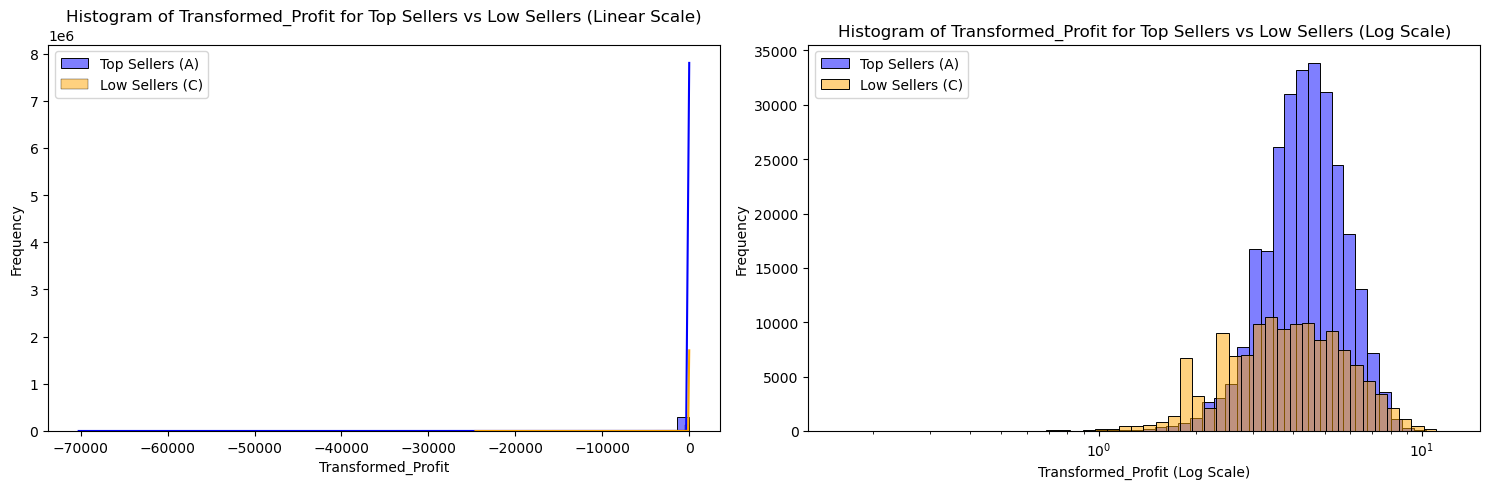

In [273]:
# Set up 2 subplot layout
plt.figure(figsize=(15, 5))

# First histogram: Transformed_Profit for Top Sellers vs Low Sellers (Linear Scale)
plt.subplot(1, 2, 1)
sns.histplot(top_sellers_sales, bins=50, kde=True, color='blue', label='Top Sellers (A)', log_scale=False)
sns.histplot(low_sellers_sales, bins=50, kde=True, color='orange', label='Low Sellers (C)', log_scale=False)
plt.title("Histogram of Transformed_Profit for Top Sellers vs Low Sellers (Linear Scale)")
plt.xlabel("Transformed_Profit")
plt.ylabel("Frequency")
plt.legend()

# Second histogram: Log-transformed Transformed_Profit for Top Sellers vs Low Sellers
plt.subplot(1, 2, 2)
sns.histplot(top_sellers_sales, bins=50, kde=True, color='blue', label='Top Sellers (A)', log_scale=True)
sns.histplot(low_sellers_sales, bins=50, kde=True, color='orange', label='Low Sellers (C)', log_scale=True)
plt.title("Histogram of Transformed_Profit for Top Sellers vs Low Sellers (Log Scale)")
plt.xlabel("Transformed_Profit (Log Scale)")
plt.ylabel("Frequency")
plt.legend()

# Show both subplots with a tight layout
plt.tight_layout()
plt.show()

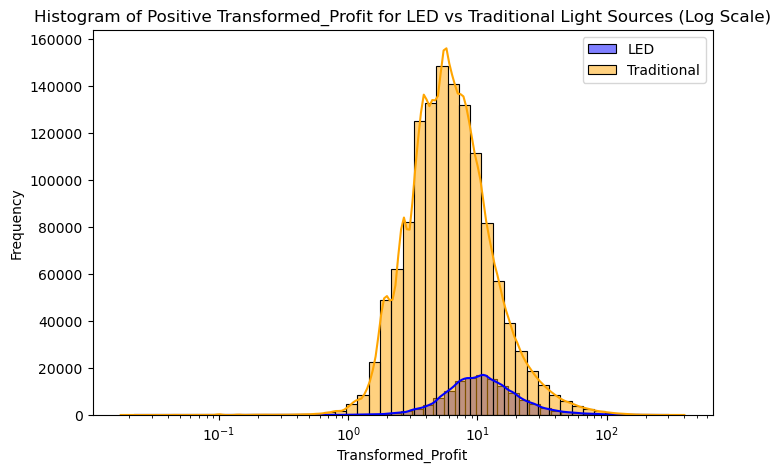

In [271]:
# Filtering out negative Transformed_Profit for both LED and Traditional
led_profit_positive = led_profit[led_profit > 0]
traditional_profit_positive = traditional_profit[traditional_profit > 0]

# Plotting histogram with only positive Transformed_Profit values
plt.figure(figsize=(8, 5))
sns.histplot(led_profit_positive, bins=50, kde=True, color='blue', label='LED', log_scale=True, alpha=0.5)
sns.histplot(traditional_profit_positive, bins=50, kde=True, color='orange', label='Traditional', log_scale=True, alpha=0.5)
plt.title("Histogram of Positive Transformed_Profit for LED vs Traditional Light Sources (Log Scale)")
plt.xlabel("Transformed_Profit")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**In summary**

The result of the t-test produced a T-statistic of approximately 90.08 and a P-value of 0. This extremely low P-value indicates a statistically significant difference in the means of Transformed_Profit between the LED and Traditional categories, so we **reject the null hypothesis**. This implies that the average profitability differs substantially between these two types of light sources, with the Traditional category likely showing higher profits.

Referring to the histogram visualised above, the traditional lights appear to be consistently more profitable, with fewer cases of negative profits. These insights can guide inventory decisions, pricing adjustments, and marketing focus. Additionally, management may want to investigate why LED products yield lower or even negative profits, possibly by improving production efficiency or adjusting pricing strategies